Logistic Regression in Python

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore', UserWarning)


In [76]:
data=pd.read_csv("ex2data1.txt",names=["exam1","exam2","result"])

In [77]:
data.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Result here is the do the candidate is admited (result=1)in university or not (result=0)

lets plot the data and see how the data looks like

In [4]:
# plot function t plot the data
def plotData(X,y):
    postive=X[np.where(y==1)]
    negtive=X[np.where(y==0)]
    fig,ax=plt.subplots()
    ax.plot(postive[:,0],postive[:,1],"k+",negtive[:,0],negtive[:,1],"ro")
    return (fig,ax)


In [5]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

In [6]:
def costFunction(theta,X,y):
    m = len(y) 
    J =(np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-(1-y)*(np.log(1-sigmoid(np.dot(X,theta)))))/m)
    grad = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
    return (J, grad)

In [7]:
def predict(theta,X):
    return np.where(np.dot(X,theta)>5.,1,0)

In [47]:
def mapFeatureVector(X1,X2):
    """
    Feature mapping function to polynomial features. Maps the two features
    X1,X2 to quadratic features used in the regularization exercise. X1, X2
    must be the same size.returns new feature array with interactions and quadratic terms
    """
    
    degree = 6
    output_feature_vec = np.ones(len(X1))[:,None]

    for i in range(1,7):
        for j in range(i+1):
            new_feature = np.array(X1**(i-j)*X2**j)[:,None]
            output_feature_vec = np.hstack((output_feature_vec,new_feature))
   
    return output_feature_vec

In [48]:

def costFunctionReg(theta,X,y,reg_param):
    m = len(y) 
    J =((np.sum(-y*np.log(sigmoid(np.dot(X,theta)))-
       (1-y)*(np.log(1-sigmoid(np.dot(X,theta))))))/m +
       (reg_param/m)*np.sum(theta**2))

    # Non-regularized 
    grad_0 = (np.sum((sigmoid(np.dot(X,theta))-y)[:,None]*X,axis=0)/m)
    
    # Regularized
    grad_reg = grad_0 + (reg_param/m)*theta
    # Replace gradient for theta_0 with non-regularized gradient
    grad_reg[0] = grad_0[0] 
    
    return J

In [78]:
def plotDecisionBoundary(theta,X,y):
    """X is asssumed to be either:
        1) Mx3 matrix where the first column is all ones for the intercept
        2) MxN with N>3, where the first column is all ones
    """
    fig, ax = plotData(X[:,1:],y)
    """
    if len(X[0]<=3):
        # Choose two endpoints and plot the line between them
        plot_x = np.array([min(X[:,1])-2,max(X[:,2])+2])
        ax.plot(plot_x,plot_y)
        ax.legend(['Admitted','Fail','Pass'])
        ax.set_xbound(30,100)
        ax.set_ybound(30,100)
    else:
    """

    # Create grid space
    u = np.linspace(-1,1.5,50)
    v = np.linspace(-1,1.5,50)
    z = np.zeros((len(u),len(v)))
    
    # Evaluate z = theta*x over values in the gridspace
    for i in range(len(u)):
        for j in range(len(v)):
            z[i][j] = np.dot(mapFeatureVector(np.array([u[i]]),
            np.array([v[j]])),theta)
    
    # Plot contour
    ax.contour(u,v,z,levels=[0])

    return (fig,ax)

In [11]:
#plotting data
X=np.asarray(data[["exam1","exam2"]])
y=np.asarray(data["result"])

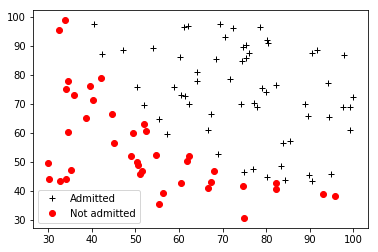

In [12]:
fig,ax=plotData(X,y)
ax.legend(["Admitted","Not admitted"])
fig.show()

In [13]:
X=np.hstack((np.ones_like(y)[:,None],X))


In [14]:
initial_theta=np.zeros(3)
cost,grad=costFunction(initial_theta,X,y)

In [15]:
print("Cost at initial theta:\n",cost)
print("Gradeint at intial theta: \n",grad)

Cost at initial theta:
 0.6931471805599453
Gradeint at intial theta: 
 [ -0.1        -12.00921659 -11.26284221]


In [32]:
from scipy.optimize import minimize
res=minimize(costFunction,initial_theta,
            method="Newton-CG",
            args=(X,y),
            jac=True,
            options={"maxinter":400,"disp":True})
theta=res.x

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 29
         Function evaluations: 72
         Gradient evaluations: 252
         Hessian evaluations: 0


In [58]:
print("cost at theta by minimize: ",res.fun)
print("theta: ",theta)

cost at theta by minimize:  0.2034977226181816
theta:  [-25.14945158   0.20613752   0.20137457]


In [39]:

prob = sigmoid(np.dot([1,75,45],theta))
print("probability of acceptence: ",prob)

probability of acceptence:  0.3481270925444401


In [69]:
p = predict(theta, X)

In [70]:
print("Accuracy",np.mean(p==y)*100)

Accuracy 69.0


NameError: name 'probs' is not defined

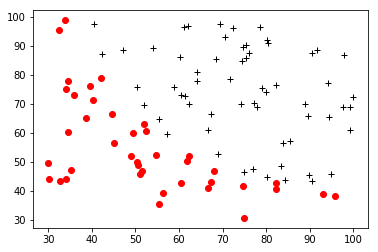

In [74]:
plotDecisionBoundary(theta, X, y)